# AZ DATA SELECTION

# Goal
Take rows from 1:1 from MAL and BEN

SVM all features and find coeffs

take all +ve and -Ve coeffs

Sum by col

    take col if it appears a certain number of times

Find num ben_cols and mal_cols.
    
    Balance them to an extent => based on lowest appearances

# Load Data and conv as NP Arrays

In [1]:
import json

In [2]:
with open("./AZ_DATA/AZ_DATA/apg-X.json", 'rt') as f:
    X_org = json.load(f)
with open("./AZ_DATA/AZ_DATA/apg-y.json", 'rt') as f:
    y_org = json.load(f)
with open("./AZ_DATA/AZ_DATA/apg-meta.json", 'rt') as f:
    meta_org = json.load(f)

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
vec = DictVectorizer()
X_full = vec.fit_transform(X_org)
y_full = y_org

In [5]:
import numpy as np

In [6]:
y_full = np.asarray(y_full).reshape(-1,1)

In [7]:
np.unique(y_full,return_counts=True)

(array([0, 1]), array([135859,  15778], dtype=int64))

In [8]:
X_full.shape

(151637, 1537062)

In [9]:
meta_org = np.asarray(meta_org).reshape(-1,1)

# Select Data

In [10]:
ben = []
mal = []
for i in range(len(y_full)):
    if y_full[i]==0:
        ben.append(i)
    else:
        mal.append(i)
print(len(ben),len(mal))

135859 15778


In [11]:
import random
ben_list = []
ben_list = random.sample(ben,len(mal))
print(len(ben_list))

15778


In [12]:
chosen = mal + ben_list
chosen.sort()
X = X_full[chosen]
y = y_full[chosen]
meta = meta_org[chosen]
print(X.shape,y.shape,meta.shape)
print(np.unique(y,return_counts=True))

(31556, 1537062) (31556, 1) (31556, 1)
(array([0, 1]), array([15778, 15778], dtype=int64))


# SVM

In [13]:
y.shape

(31556, 1)

In [14]:
from sklearn.svm import LinearSVC

In [15]:
selector = LinearSVC(C=2)
selector.fit(X, y)

C:\Users\Pitch\.conda\envs\tf1-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pitch\.conda\envs\tf1-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2)

In [16]:
len(y)

31556

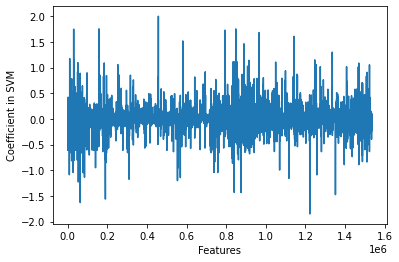

In [17]:
import matplotlib.pyplot as plt
plt.xlabel("Features")
plt.ylabel("Coefficient in SVM")
plt.plot(selector.coef_[0])

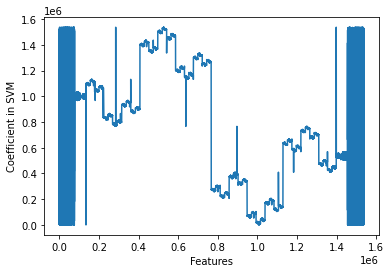

In [18]:
import matplotlib.pyplot as plt
plt.xlabel("Features")
plt.ylabel("Coefficient in SVM")
plt.plot(np.argsort(selector.coef_[0]))

In [19]:
cols1 = np.argsort(selector.coef_[0])[::-1]
p = n = z = 0
cols2 = []
for i in cols1:
    if selector.coef_[0][i] < 0:
        n+=1
        cols2.append(i)
    elif selector.coef_[0][i] > 0:
        p+=1
        cols2.append(i)
    else:
        z+=1
print(p,n,z)
print(len(cols2))

82104 75920 1379038
158024


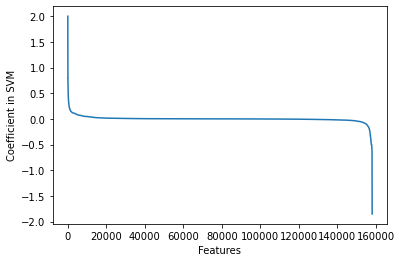

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("Features")
plt.ylabel("Coefficient in SVM")
plt.plot(selector.coef_[0][cols2])

### removing all cols from xtrain and xtest if they are 0 contrib

In [21]:
X2 = X[:,cols2]
y2 = y
coeff2 = selector.coef_[0][cols2]
print(X2.shape,y2.shape,len(coeff2))
coeff2

(31556, 158024) (31556, 1) 158024


array([ 1.99930011,  1.75367605,  1.75215874, ..., -1.56137623,
       -1.6297654 , -1.8504997 ])

### Trim by Frequency. Setting at 0.0003 % of dataset

In [31]:
Percent = 0.0003

FC = X[:,cols2].sum(axis=0).reshape(-1,1)
print(FC.shape)
C = 0
LOF = []
for i in range(len(FC)):
    if FC[i][0] > (int(Percent*y2.shape[0])): #guess
        C+=1
        LOF.append(i)
print(y2.shape[0])
print(int(Percent*y2.shape[0]))
print(len(LOF))

(158024, 1)
31556
9
9883


In [32]:
X3 = X2[:,LOF]
y3 = y2
coeff3 = coeff2[LOF]
print(X3.shape,y3.shape,len(coeff3))
coeff3

(31556, 9883) (31556, 1) 9883


array([ 1.68149732,  1.14953946,  1.10703168, ..., -1.15915335,
       -1.20155706, -1.8504997 ])

Save these

HAD TO GO FOR SCIPY SPARSE ARRAY FOR CONVERTING TO ARRAY FOR SAVING X TRAIN N TEST

In [33]:
import scipy

In [34]:
X_S = scipy.sparse.csr_matrix.toarray(X3)

In [35]:
np.save('./DATAVIZ/AZ_X.npy',X_S)
np.save('./DATAVIZ/AZ_Y.npy',y3)
np.save('./DATAVIZ/AZ_META.npy',meta)
np.save('./DATAVIZ/AZ_COEFF.npy',coeff3)

In [36]:
print("DONE")

DONE


In [37]:
meta.shape

(31556, 1)